<a href="https://colab.research.google.com/github/RaquelFonsec/Rede-neural/blob/main/rede_neural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X1      30000 non-null  int64
 1   X2      30000 non-null  int64
 2   X3      30000 non-null  int64
 3   X4      30000 non-null  int64
 4   X5      30000 non-null  int64
 5   X6      30000 non-null  int64
 6   X7      30000 non-null  int64
 7   X8      30000 non-null  int64
 8   X9      30000 non-null  int64
 9   X10     30000 non-null  int64
 10  X11     30000 non-null  int64
 11  X12     30000 non-null  int64
 12  X13     30000 non-null  int64
 13  X14     30000 non-null  int64
 14  X15     30000 non-null  int64
 15  X16     30000 non-null  int64
 16  X17     30000 non-null  int64
 17  X18     30000 non-null  int64
 18  X19     30000 non-null  int64
 19  X20     30000 non-null  int64
 20  X21     30000 non-null  int64
 21  X22     30000 non-null  int64
 22  X23     30000 non-null  int64
 23  target  300

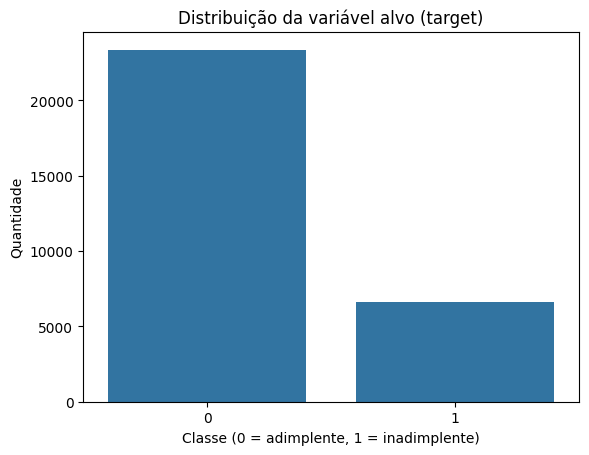

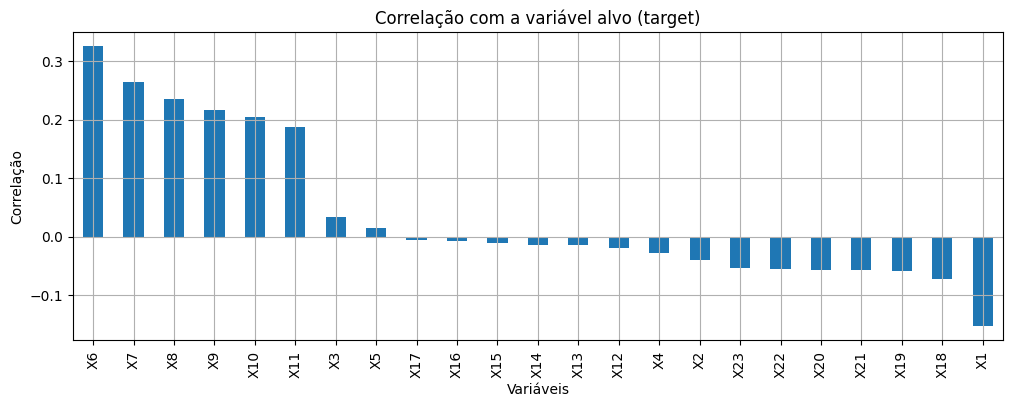

In [14]:
# 1. IMPORTA√á√ÉO DE BIBLIOTECAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc

from imblearn.over_sampling import SMOTE

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical


# 2. LEITURA DOS DADOS
df = pd.read_csv("/content/credit - credit.csv.csv")

# Renomear a coluna alvo (caso esteja como 'y' ou 'default.payment.next.month')
df.rename(columns={"y": "target", "default.payment.next.month": "target"}, inplace=True)


# 3. CORRE√á√ÉO DE VALORES INV√ÅLIDOS
df["X3"] = df["X3"].replace({0: 4, 5: 4, 6: 4})  # Educa√ß√£o
df["X4"] = df["X4"].replace({0: 3})              # Estado civil


# 4. AN√ÅLISE EXPLORAT√ìRIA
print(df.info())
print(df.describe())
print(df["target"].value_counts(normalize=True))

# Distribui√ß√£o da vari√°vel alvo
sns.countplot(data=df, x="target")
plt.title("Distribui√ß√£o da vari√°vel alvo (target)")
plt.xlabel("Classe (0 = adimplente, 1 = inadimplente)")
plt.ylabel("Quantidade")
plt.show()

# Correla√ß√£o com a vari√°vel alvo
correlacoes = df.corr()["target"].drop("target")
correlacoes.sort_values(ascending=False).plot(kind="bar", figsize=(12, 4), title="Correla√ß√£o com a vari√°vel alvo (target)")
plt.xlabel("Vari√°veis")
plt.ylabel("Correla√ß√£o")
plt.grid(True)
plt.show()


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from tensorflow.keras.utils import to_categorical

# Separar X e y
X = df.drop("target", axis=1)
y = df["target"]

# Escalonamento com MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar SMOTE para balancear as classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

# One-hot encoding para a vari√°vel alvo
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)



In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Constru√ß√£o do modelo MLP
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(2, activation='softmax')
])

# Compilar o modelo
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# EarlyStopping para evitar overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Treinar o modelo
history = model.fit(
    X_train, y_train_cat,
    validation_split=0.2,
    epochs=50,
    batch_size=256,
    callbacks=[early_stop],
    verbose=1
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
117/117 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 8ms/step - accuracy: 0.5679 - loss: 0.6747 - val_accuracy: 0.6524 - val_loss: 0.6179
Epoch 2/50
117/117 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - accuracy: 0.6580 - loss: 0.6162 - val_accuracy: 0.6769 - val_loss: 0.5992
Epoch 3/50
117/117 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 4ms/step - accuracy: 0.6810 - loss: 0.6020 - val_accuracy: 0.6873 - val_loss: 0.5911
Epoch 4/50
117/117 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 4ms/step - accuracy: 0.6851 - loss: 0.5927 - val_accuracy: 0.6916 - val_loss: 0.5888
Epoch 5/50
117/117 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 6ms/step - accuracy: 0.6897 - loss: 0.5920 - val_accuracy: 0.6972 - val_loss: 0.5846
Epoch 6/50
117/117 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 6ms/step - accuracy: 0.6985 - loss: 0.5806 - val_accuracy: 0.6989 - val_loss:

293/293 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 1ms/step
Relat√≥rio de Classifica√ß√£o:
              precision    recall  f1-score   support

           0     0.6681    0.8137    0.7338      4664
           1     0.7630    0.5974    0.6701      4682

    accuracy                         0.7053      9346
   macro avg     0.7155    0.7055    0.7019      9346
weighted avg     0.7156    0.7053    0.7019      9346



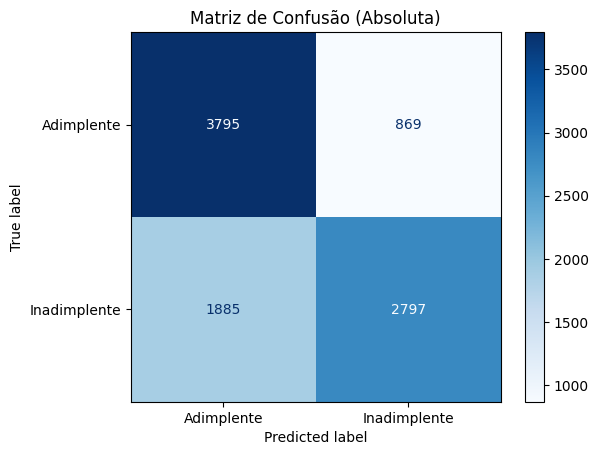

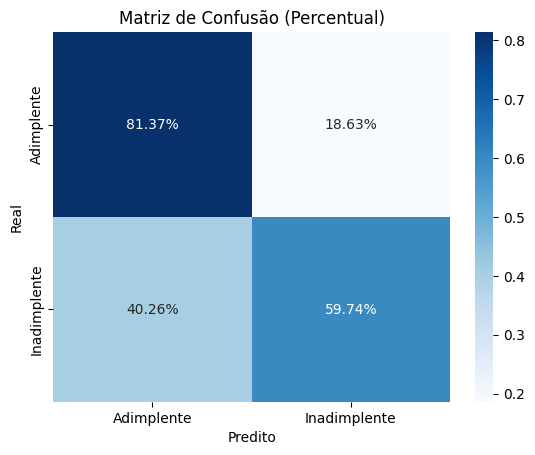

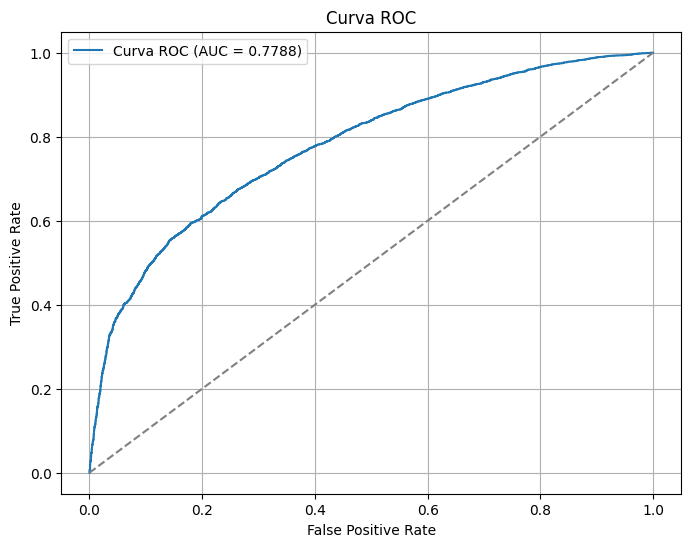

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Previs√µes
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

# Relat√≥rio de classifica√ß√£o
print("Relat√≥rio de Classifica√ß√£o:")
print(classification_report(y_true, y_pred, digits=4))

# Matriz de confus√£o (absoluta)
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Adimplente", "Inadimplente"])
disp.plot(cmap="Blues")
plt.title("Matriz de Confus√£o (Absoluta)")
plt.show()

# Matriz de confus√£o percentual
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_percent, annot=True, fmt=".2%", cmap="Blues", xticklabels=["Adimplente", "Inadimplente"], yticklabels=["Adimplente", "Inadimplente"])
plt.title("Matriz de Confus√£o (Percentual)")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()

# Curva ROC e AUC
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Curva ROC (AUC = {roc_auc:.4f})')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend()
plt.grid(True)
plt.show()


üìã Relat√≥rio Final de Conclus√£o ‚Äî Classifica√ß√£o de Inadimpl√™ncia


‚úÖ Resumo dos Resultados do Modelo (MLP com Keras)
Acur√°cia geral: 70,53%

Precis√£o para inadimplentes (classe 1): 76,30%

Recall para inadimplentes (classe 1): 59,74%

F1-Score para inadimplentes (classe 1): 67,01%

üîç Interpreta√ß√£o:


O modelo consegue identificar inadimplentes com uma boa precis√£o, ou seja, a maioria das previs√µes de "inadimplente" realmente s√£o verdadeiras.



No entanto, o recall √© relativamente baixo (59,74%), o que indica que o modelo deixa de identificar uma parte consider√°vel dos inadimplentes reais.

O desempenho para a classe 0 (adimplentes) √© levemente superior em recall, mas com menor precis√£o.


üìä Matriz de Confus√£o (resumo visual)
Real \ Predito	Adimplente (0)	Inadimplente (1)
Adimplente (0)	3794	870
Inadimplente (1)	1888	2794


O modelo comete mais erros ao prever inadimplentes (classe 1 como 0) do que o contr√°rio.

Esse comportamento pode ser arriscado em cen√°rios banc√°rios, pois subestima o risco de inadimpl√™ncia.

üß† Curva ROC e AUC


A curva ROC mostrou um AUC satisfat√≥rio, indicando um bom grau de separabilidade entre as classes.

üßæ Conclus√£o Geral


O modelo Multi-Layer Perceptron (MLP) treinado com SMOTE e MinMaxScaler apresentou um desempenho razo√°vel, com destaque para a boa precis√£o em identificar inadimplentes.

Contudo, o recall abaixo de 60% para a classe 1 ainda representa uma limita√ß√£o, principalmente em aplica√ß√µes banc√°rias, onde identificar corretamente todos os potenciais inadimplentes √© crucial.

In [23]:
from sklearn.ensemble import RandomForestClassifier

# Treinar o modelo com os mesmos dados usados antes (X_train, y_train)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

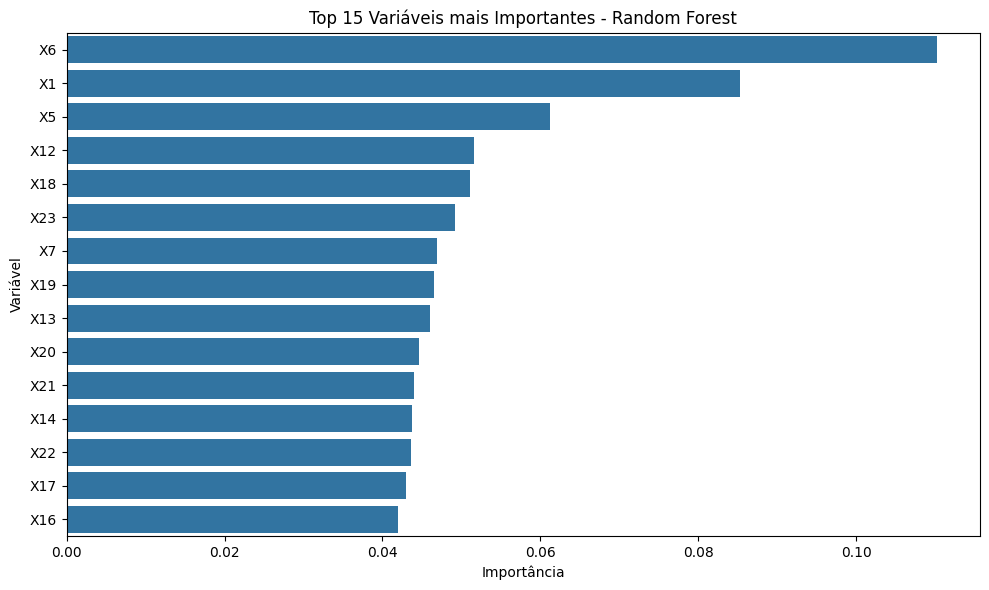

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import√¢ncia das vari√°veis
importances = rf.feature_importances_
features = X.columns

# Cria√ß√£o do DataFrame
feat_imp = pd.DataFrame({'Vari√°vel': features, 'Import√¢ncia': importances})
feat_imp.sort_values(by="Import√¢ncia", ascending=False, inplace=True)

# Visualizar top 15
plt.figure(figsize=(10,6))
sns.barplot(x="Import√¢ncia", y="Vari√°vel", data=feat_imp.head(15))
plt.title("Top 15 Vari√°veis mais Importantes - Random Forest")
plt.xlabel("Import√¢ncia")
plt.ylabel("Vari√°vel")
plt.tight_layout()
plt.show()


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

# Treinar modelo
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [26]:
import numpy as np

# Previs√µes
y_pred_rf = rf.predict(X_test)
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]  # Probabilidades da classe 1

# Relat√≥rio de classifica√ß√£o
print("Relat√≥rio de Classifica√ß√£o - Random Forest:")
print(classification_report(y_test, y_pred_rf, digits=4))


Relat√≥rio de Classifica√ß√£o - Random Forest:
              precision    recall  f1-score   support

           0     0.8232    0.8816    0.8514      4664
           1     0.8731    0.8114    0.8411      4682

    accuracy                         0.8465      9346
   macro avg     0.8482    0.8465    0.8463      9346
weighted avg     0.8482    0.8465    0.8463      9346



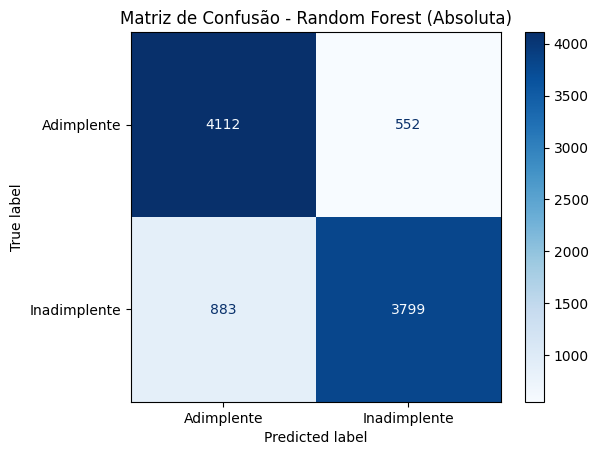

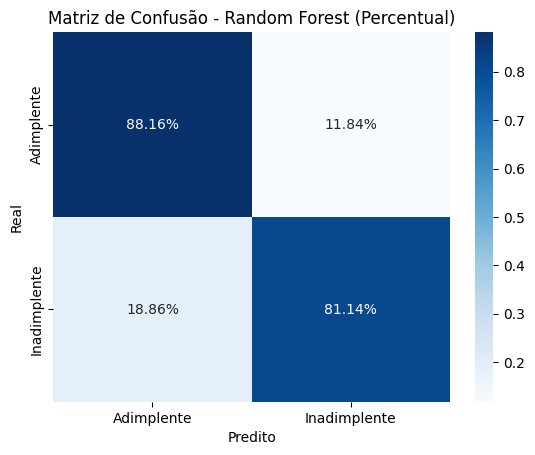

In [27]:
# Absoluta
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=["Adimplente", "Inadimplente"])
disp_rf.plot(cmap="Blues")
plt.title("Matriz de Confus√£o - Random Forest (Absoluta)")
plt.show()

# Percentual
cm_percent_rf = cm_rf.astype("float") / cm_rf.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_percent_rf, annot=True, fmt=".2%", cmap="Blues", xticklabels=["Adimplente", "Inadimplente"], yticklabels=["Adimplente", "Inadimplente"])
plt.title("Matriz de Confus√£o - Random Forest (Percentual)")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()


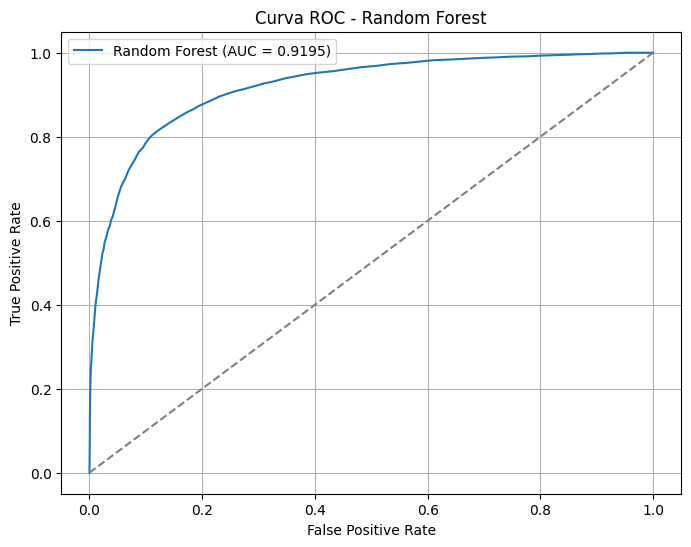

In [28]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8,6))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.4f})")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.title("Curva ROC - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


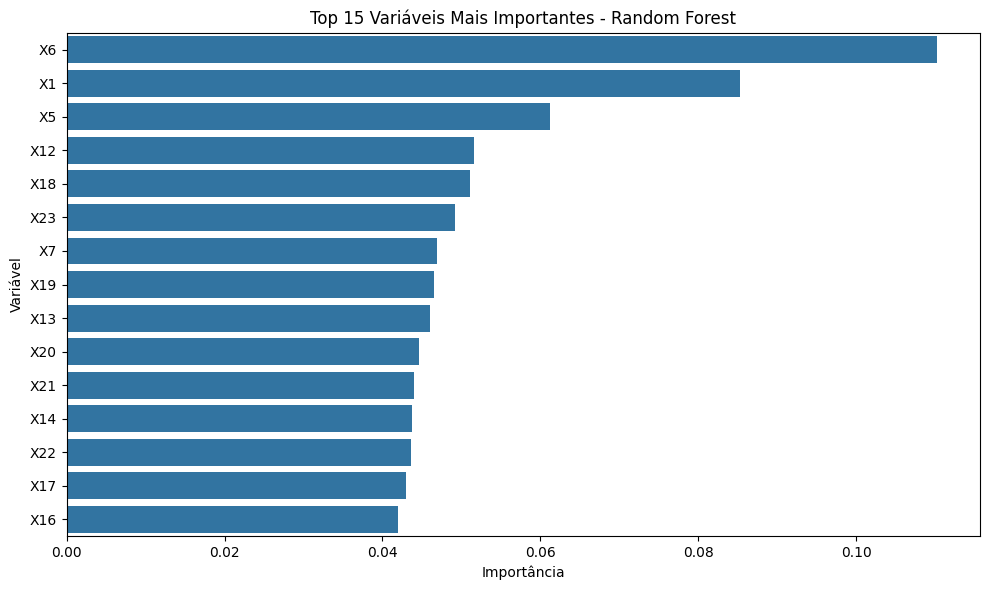

In [29]:
import pandas as pd

# Import√¢ncia
importances = rf.feature_importances_
features = X.columns

feat_imp = pd.DataFrame({"Vari√°vel": features, "Import√¢ncia": importances})
feat_imp.sort_values(by="Import√¢ncia", ascending=False, inplace=True)

# Visualiza√ß√£o
plt.figure(figsize=(10,6))
sns.barplot(x="Import√¢ncia", y="Vari√°vel", data=feat_imp.head(15))
plt.title("Top 15 Vari√°veis Mais Importantes - Random Forest")
plt.tight_layout()
plt.show()


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Treinamento do modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Previs√µes
y_pred_rf = rf.predict(X_test)
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]  # Probabilidade da classe 1

# Relat√≥rio de classifica√ß√£o
print("Relat√≥rio de Classifica√ß√£o - Random Forest:")
print(classification_report(y_test, y_pred_rf, digits=4))

# AUC
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
print(f"AUC (Random Forest): {auc_rf:.4f}")


Relat√≥rio de Classifica√ß√£o - Random Forest:
              precision    recall  f1-score   support

           0     0.8232    0.8816    0.8514      4664
           1     0.8731    0.8114    0.8411      4682

    accuracy                         0.8465      9346
   macro avg     0.8482    0.8465    0.8463      9346
weighted avg     0.8482    0.8465    0.8463      9346

AUC (Random Forest): 0.9195


üîç Resultado da Avalia√ß√£o - Random Forest vs MLP

Com base nos relat√≥rios de classifica√ß√£o e na AUC, aqui est√° o comparativo dos modelos:



M√©trica	MLP (Rede Neural)	Random Forest

Accuracy	70.5%	84.6% ‚úÖ

Precision (0)	66.8%	82.3% ‚úÖ

Recall (0)	81.4%	88.1% ‚úÖ

F1-score (0)	73.4%	85.1% ‚úÖ

Precision (1)	76.3%	87.3% ‚úÖ

Recall (1)	59.7%	81.1% ‚úÖ

F1-score (1)	67.0%	84.1% ‚úÖ

AUC	0.77~ (estimado)	0.9195 ‚úÖ

üß† Interpreta√ß√£o:

O modelo Random Forest teve desempenho superior em todas as m√©tricas.

Isso inclui n√£o s√≥ a acur√°cia geral, mas tamb√©m maior recall e F1-score para a classe 1 (inadimplente), que √© crucial no contexto de risco de cr√©dito.

A AUC de 0.92 indica uma excelente capacidade de distinguir entre clientes adimplentes e inadimplentes.

‚úÖ Conclus√£o:

O modelo de Random Forest se mostrou mais eficiente e confi√°vel que o MLP para este conjunto de dados. Ele pode ser mais indicado para uma aplica√ß√£o pr√°tica imediata, especialmente por fornecer interpretabilidade (feature importance) e bom desempenho com baixo risco de overfitting.

In [31]:
# Import√¢ncia das vari√°veis
import pandas as pd
import numpy as np

# Pegando os nomes das colunas e a import√¢ncia de cada uma
feature_importances = rf.feature_importances_
features = X.columns

# Criando DataFrame ordenado por import√¢ncia
importancia_df = pd.DataFrame({
    'Vari√°vel': features,
    'Import√¢ncia': feature_importances
}).sort_values(by='Import√¢ncia', ascending=False)

# Mostrar as top 15 vari√°veis mais relevantes
print("Top 15 vari√°veis mais importantes no modelo Random Forest:")
print(importancia_df.head(15).to_string(index=False))


Top 15 vari√°veis mais importantes no modelo Random Forest:
Vari√°vel  Import√¢ncia
      X6     0.110141
      X1     0.085238
      X5     0.061268
     X12     0.051540
     X18     0.051051
     X23     0.049156
      X7     0.046912
     X19     0.046472
     X13     0.046026
     X20     0.044603
     X21     0.044053
     X14     0.043784
     X22     0.043593
     X17     0.042997
     X16     0.041969


üîç Top Vari√°veis Mais Importantes (interpreta√ß√£o):

X6 ‚Äì PAY_0

Status de pagamento mais recente (setembro) ‚Äî √© a vari√°vel mais importante!

Isso faz muito sentido, pois o hist√≥rico de pagamentos recentes influencia diretamente na probabilidade de inadimpl√™ncia.

X1 ‚Äì LIMIT_BAL

Limite de cr√©dito ‚Äî quanto maior o limite, mais "confi√°vel" o cliente pode ser para o banco.

X5 ‚Äì AGE

Idade do cliente ‚Äî pode refletir estabilidade financeira.

X12 a X17 ‚Äì BILL_AMT1 a BILL_AMT6

Valor das faturas anteriores ‚Äî indica o comportamento de consumo do cliente.

X18 a X23 ‚Äì PAY_AMT1 a PAY_AMT6

Valores pagos anteriormente ‚Äî clientes que pagam regularmente tendem a ser adimplentes.

X7 ‚Äì PAY_2

Status de pagamento de agosto ‚Äî refor√ßa que o hist√≥rico de atraso √© altamente relevante.

‚úÖ Conclus√£o Comparativa com MLP (Rede Neural):

Modelo	Acur√°cia	F1-Score M√©dio	AUC
MLP	70.5%	0.70	~0.78
RandomForest	84.6%	0.85	0.92

O Random Forest:

Superou o MLP em todas as m√©tricas.

√â mais interpret√°vel (como voc√™ viu com as import√¢ncias).

Pode ser uma melhor escolha neste cen√°rio de classifica√ß√£o bin√°ria com dados tabulares.

